# Team 8 Project 3 `Lung cancer subtyping`
Team members: `George Oliver Roy, Noor Alesawy, Quancheng Liu, Yunxuan Xie`

## 1 Wirtten answers section

### `Quancheng Liu's` answer to the following three questions:

<b>In addition, each team member has to provide an answer to the following three questions:  </b>   
<b> - What was your biggest challenge in this project? (regarding writing code and not only) </b>  
  
Ans: The most challenging part of this project is to understand the data structure and the methods to manipulate the data.  
I spent most of my time on reading the documentation to understand the data structure and the methods.  
  
<b> - What did you learn while working on this project? (regarding writing code and not only) </b>  
  
Ans: Through out this project, I added more methods to our class later, however, I found out because of the implementation of the methods,  
Adding more function to the class might resulting change of multiple methods which is not efficient. Therefore, I learned that it is better to  
design the class structure to be more flexible and each method more modular.  
  
<b> - If you had more time on the project what other question(s) would you like to answer? (at least one question is required) </b>
  
Ans: If I have more time, I would try out this project's generalization to other data sets. For instance, with more then two subtypes.  
To find out whether our method is applicable to other data sets.
_____________

### `George Oliver Roy` answer to the following three questions:

<b>In addition, each team member has to provide an answer to the following three questions:  </b>   
<b> - What was your biggest challenge in this project? (regarding writing code and not only) </b>  
  
Ans: 1.	My biggest challenge for this project was understanding how to extract the necessary information from the SOFT file.   
This was because I had never worked with a file in which information was only accessible through specific indexing prompts before.   
While the code for extracting data from the SOFT file ended up being much simpler than I initially anticipated, learning how to do so was a challenging,  
 rewarding experience. My biggest non-coding challenge was learning how to coordinate writing code with other people. Everyone in our group was quite busy and had very different coding skill levels and approaches.  
Figuring out how to effectively work with what we had each written and communicating as a team was sometimes quite difficult.

  
<b> - What did you learn while working on this project? (regarding writing code and not only) </b>  
  
Ans: 2.	While working on this project, the biggest thing I learned was how to properly consult documentation. Up to this point,   
most of my coding experience has been simple or tied to coursework. As a result, while I was used to seeking help from external resources,  
 I was unfamiliar with reading documentation to understand code. I also learned how to extract SOFT formatted data and how to perform k-means clustering.

  
<b> - If you had more time on the project what other question(s) would you like to answer? (at least one question is required) </b>
  
Ans: 3.	If I had more time on the project, I would like to try clustering the data using different algorithms. For example,   
I would have liked to perform mean-shift clustering on the data and to compare the accuracy of this method with the accuracy of k-means clustering.  
 I would have also liked to try repeatedly performing clustering on the data and assessing its accuracy over multiple attempts. Ultimately, I would like to try and determine which clustering method is fastest and most consistent for analyzing this data.
_____________


### `Yunxuan Xie` answer to the following three questions:

<b>In addition, each team member has to provide an answer to the following three questions:  </b>   
<b> - What was your biggest challenge in this project? (regarding writing code and not only) </b>  
  
Ans: Self-teach the machine learning methods and all the packages, process the data and build the model.
  
<b> - What did you learn while working on this project? (regarding writing code and not only) </b>  
  
Ans: Team spirit, I take care of the accuracy part, so I have to use the processed data to finish my part.   
And also mostly I have to search the methods by myself and look through the examples online.
  
<b> - If you had more time on the project what other question(s) would you like to answer? (at least one question is required) </b>
  
Ans: I would like to try different model to get better accuracy and also try different combination of the split and to see get the best accuracy.

### `__` answer to the following three questions:

<b>In addition, each team member has to provide an answer to the following three questions:  </b>   
<b> - What was your biggest challenge in this project? (regarding writing code and not only) </b>  
  
Ans:
  
<b> - What did you learn while working on this project? (regarding writing code and not only) </b>  
  
Ans: 
  
<b> - If you had more time on the project what other question(s) would you like to answer? (at least one question is required) </b>
  
Ans: 

______________________________________________________

## 2 Class GSEs code section

In [43]:
import GEOparse
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import os
import warnings

class GSEs:
    """
    The GSEs class is a wrapper class for GEOparse.GSE object. It provides a convenient way to perform kmeans clustering on the gene expression matrix.
    And it also provides a method to get the accuracy of the prediction as well as the visualization of the clustering result.
    """
    
    def __init__(self, *, file_path:str=None, gse:GEOparse=None):
        """initialize the class

        Args:
            file_path (str, optional): path of soft file. Defaults to None.
            gse (GEOparse.GSE, optional): read gse directly if gse object is provided else use read_soft. Defaults to None.
            matrix (array, optional): gene expression matrix. Defaults to None.
            annotations (dataframe, optional): disease type annotations of the matrix. Defaults to None.
            model (kmeans.Model, optional): kmeans model. Defaults to None.
            training_data (dataframe, optional): training data. Defaults to None.
            testing_data (dataframe, optional): testing data. Defaults to None.
            predict_matrix (dataframe, optional): predictions cluster number dataframe. Defaults to None.
            accuracy_matrix (dataframe, optional): accuracy dataframe. Defaults to None.
            accuracy (float, optional): accuracy of the model. Defaults to None.
            seed (int, optional): random state. Defaults to None.
            training_frac (float, optional): fraction of training data. Defaults to None.
            testCondition (str, optional): condition of test data. Defaults to None.
            archive (dataframe, optional): archive of the predict result and pca datas. Defaults to empty dataframe.
        """
        
        self.__gse = gse #GEOparse.GSE object
        self.__seed = None #random seed
        self.__matrix = None #pandas dataframe
        self.__annotations = None #dataframe
        self.__model = None #kmeans model
        self.__training_data = None #dataframe
        self.__training_frac = None #float
        self.__testing_data = None #dataframe
        self.__testCondition = None #string
        self.__predict_matrix = None #predictions cluster number dataframe
        self.__accuracy_matrix = None #accuracy dataframe
        self.__accuracy = None #prediction accuracy in float
        self.__archive = pd.DataFrame() #archive of accuracy for different training size
        self.__pca = None #pca matrix

        if file_path:
            self.read_soft(file_path=file_path) #read soft file
        if gse is not None:
            self._initialize()

    #region property
    @property
    def gse(self):
        return self.__gse
    
    @property
    def seed(self):
        return self.__seed
    
    @property
    def matrix(self):
        return self.__matrix
    
    @property
    def annotations(self):
        return self.__annotations
    
    @property
    def model(self):
        return self.__model
    
    @property
    def training_data(self):
        return self.__training_data
    
    @property
    def testing_data(self):
        return self.__testing_data
    
    @property
    def predict_matrix(self):
        return self.__predict_matrix
    
    @property
    def accuracy_matrix(self):
        return self.__accuracy_matrix

    @property
    def accuracy(self):
        return self.__accuracy

    @property
    def archive(self):
        return self.__archive

    @property
    def testCondition(self):
        return self.__testCondition
    
    @property
    def pca_matrix(self):
        return self.__pca

    #endregion

    #region methods
    def _initialize(self):
        """
        initialize the class get the gene expression matrix and annotations
        """
        self._get_matrix()._get_annotations()
        return self


    def read_soft(self, file_path):
        """
        read soft file
        """
        self.__gse = GEOparse.get_GEO(filepath=file_path) 
        self._initialize() #initialize the parameters for later use
        return self
    
    def _get_matrix(self):
        """get the gene expression matrix"""
        if self.__gse:
            self.__matrix = self.__gse.pivot_samples('VALUE').T
        else:
            raise ReferenceError('No file path')
        return self

    def _get_annotations(self):
        """table is a pandas dataframe with the following columns: sample_id and characteristics_ch1.0.disease state

        Returns:
            self: for a chain call
        """
        self.__annotations = self.__gse.phenotype_data[['characteristics_ch1.0.disease state']].copy()
        return self
    
    def _subset(self, fraction:float, matrix=None):
        """subset the matrix into training and testing data with fraction.
        Each disease subset will have the same proportion of training and testing data

        Args:
            fraction (float): fraction of training data
            matrix (_type_, optional): gene expression matrix. Defaults to None and will use self.__matrix.

        Raises:
            ValueError: fraction must be between 0 and 1

        Returns:
            self: for a chain call
        """
        if matrix is None:
            matrix = self.__matrix.copy()
        elif fraction<=0 or fraction>1:
            raise ValueError('fraction must be between 0 and 1')
        merged_dataframe = self.__annotations.merge(matrix, left_index=True, right_index=True) #add disease state to the gene expression matrix
        training_data = merged_dataframe.groupby('characteristics_ch1.0.disease state').apply(lambda x: x.sample(random_state=self.__seed,frac=fraction)).droplevel(0) #training data with balanced disease type
        testing_data = merged_dataframe.drop(training_data.index) # drop the training data from the original dataframe to get the testing data
        # sort by id
        training_data = training_data.sort_index()
        testing_data = testing_data.sort_index()

        self.__training_data = training_data
        self.__testing_data = testing_data

        return self

    
    def train_model(self, n_clusters=2,train_frac: float=1.0, matrix=None, seed=None, ignore_warnings=True):
        """using kmeans to train model

        Args:
            n_clusters (int, optional): number of k means cluster. Defaults to 2.
            matrix (array, optional): matrix with gene expression information. Defaults to None.
            train_size (float, optional): precentage of training sample. Defaults to None.
            seed (int, optional): random seed. Defaults to None.
        Returns:
            self: return self for a chain call
        """
        self._reset_model() #reset the model first
        self.__training_frac = train_frac
        if ignore_warnings:
            self.__ignore_warnings()

        if seed:#set random seed if provided
            seed = seed
        else:
            seed = self.__seed

        if matrix is None:
            self._get_matrix()
            matrix = self.__matrix

        if train_frac !=1.0:
            self._subset(train_frac, matrix)
            matrix = self.__training_data
            self.__testCondition = f'test on data other than training (fraction: {1-train_frac})'
        else:
            self.__training_data = matrix
            self.__testing_data = matrix
            self.__testCondition = 'test all'

        if 'characteristics_ch1.0.disease state' in matrix.columns: #drop the disease state column from the matrix
            matrix = matrix.drop('characteristics_ch1.0.disease state', axis=1) 

        self.__model = KMeans(n_clusters=n_clusters, random_state=seed).fit(matrix)
        return self

    def predict(self, test_matrix=None, testOnTrain: bool=False):
        """predict the cluster number for the testing data

        Args:
            matrix (dataframe, optional): testing gene expression matrix. Defaults to None and will use the testing data in the class.
            testOnTrain (bool, optional): test on training data. Defaults to False.
            
        Returns:
            self: return self for a chain call
        """
        if test_matrix is None:
            if testOnTrain: # if testOnTrain, then use the training data for testing
                test_matrix = self.__training_data
                self.__testCondition = 'test on training data'
            else:
                test_matrix = self.__testing_data
        else:
            test_matrix = test_matrix
            self.__condition = 'test on provided data'
            self.__testing_data = test_matrix
        
        # drop the disease state column from the matrix for prediction
        if 'characteristics_ch1.0.disease state' in test_matrix.columns:
            test_matrix = test_matrix.drop('characteristics_ch1.0.disease state', axis=1)
        

        predictions = self.__model.predict(test_matrix)
        predictions = pd.DataFrame(predictions, index=test_matrix.index, columns=['cluster_number'])
        self.__predict_matrix = predictions

        ## run pca 
        pca = self.pca(n_components=2,data=test_matrix)
        # archive data
        self._accuracy_data()
        return self

    def _accuracy_data(self):
        """test the accuracy of the model.
        Since kmeans is unsupervised learning, the cluster might not be the same as the disease type.
        This function will use premutation to find the best match between the cluster and the disease type
        pravite function. Use predict() to get the accuracy

        Raises:
            ReferenceError: No predictions data

        Returns:
            self: return self for a chain call
        """

        if self.__predict_matrix is None:
            raise ReferenceError('No predictions')
        accuracy_df = self.__predict_matrix.merge(self.__annotations, left_index=True, right_index=True)
        
        lables = list(self.__annotations['characteristics_ch1.0.disease state'].unique()) # get the unique disease type

        max_accuracy = 0
        max_accuracy_df = None
        for permutation in itertools.permutations(lables): #permutation of the disease type
            num_key = list(range(len(lables)))
            lables_dict = dict(zip(num_key, permutation))
            accuracy_df['prediction'] = accuracy_df['cluster_number'].replace(lables_dict)
            cur_accuracy = accuracy_df[accuracy_df['characteristics_ch1.0.disease state'] == accuracy_df['prediction']].shape[0]/accuracy_df.shape[0] #calculate the accuracy

            if cur_accuracy > max_accuracy: #if the current accuracy is higher than the max accuracy, update the max accuracy
                max_accuracy = cur_accuracy
                max_accuracy_df = accuracy_df.copy()
    
        self.__accuracy_matrix = max_accuracy_df
        self.__accuracy = max_accuracy
        self._archive()
        return self

    def str_accuracy(self):
        """print the accuracy of the model
        """
        print(f'Accuracy of prediction on ({self.__testCondition}): {self.__accuracy*100:.4f}%')
        return self

    def set_seed(self, seed):
        """set the random seed
        """
        self.__seed = seed
        return self

    def _archive(self):
        """archive the current accuracy to the archive dataframe
        """
        if self.__accuracy is not None:
            index = f'train_frac: {self.__training_frac}, {self.__testCondition}, seed: {self.__seed}'
            pca_df = pd.DataFrame()
            pca_df['type'] = self.__accuracy_matrix['prediction']
            pca_df['PC1'] = self.__pca[:,0]
            pca_df['PC2'] = self.__pca[:,1]
            archive = pd.DataFrame({'training_frac': [self.__training_frac], 'testing_frac': [self.__testing_frac], \
                'accuracy': [self.__accuracy], 'seed':[self.__seed], 'pca':[pca_df],'accuracy_matrix':[self.__accuracy_matrix]}, index=[index])
            self.__archive = pd.concat([self.__archive, archive])
        return self

    def pca(self, n_components=2, data=None):
        """perform pca on the matrix
        """
        if data is None:
            data = self.__matrix
        pca = PCA(n_components=n_components)
        self.__pca = pca.fit_transform(data)
        return self
    
    def barplot_accuracy(self):
        """plot the accuracy of the model using seaborn barplot
        """
        if self.__archive is not None:
            archive = self.__archive.copy()
            sns.set(rc={'figure.figsize':(20.7,8.27)})
            sns.barplot(data=archive,x=archive.index, y='accuracy')
        return self
    
    def scatter_pca(self):
        pca = self.archive.pca
        pca_df = pd.DataFrame()
        indexs = pca.index
        for idx in indexs:
            cur_pca_df = pca.loc[idx].copy(deep=True)
            cur_pca_df['condition'] = idx
            pca_df = pd.concat([pca_df, cur_pca_df], axis=0)
        sns.FacetGrid(pca_df, hue="type",col='condition',height=6).map(plt.scatter, "PC1", "PC2").add_legend()
        return self

    def _reset_model(self):
        """reset the model and related porperties
        """
        self.__model = None #kmeans model
        self.__training_data = None #dataframe
        self.__testing_data = None #dataframe
        self.__predict_matrix = None #predictions cluster number dataframe
        self.__accuracy_matrix = None #accuracy dataframe
        self.__accuracy = None #prediction accuracy in float
        self.__training_frac = None #training fraction
        self.__testing_frac = None #testing fraction
        self.__pca = None #pca matrix
        return self
    
    def __ignore_warnings(self):
        """ignore kmeans warnings
        """
        os.environ["OMP_NUM_THREADS"] = "1"
        warnings.filterwarnings('ignore')
        return self

    def clear_cache(self):
        """clear the archive cache
        """
        self.__archive = pd.DataFrame()
        return self

    #endregion



## Description of the project
The goal of this class project is to build and evaluate a mathematical model that can discriminate between two lung cancer subtypes.
To build the model we use an unsupervised k-means clustering algorithm (Euclidean distance) of 58 NSCLC tumors using k=2.
To evaluate the model we compute the model accuracy. Accuracy in this case is the percentage of samples that the model assigns to the wrong subtype outof all the samples it classifies. </br>
<img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/7588abeafe63ab4b8ae63f954978186276e54d01 width = "400"/>



## Data
The data contains 40 adenocarcinoma (AD) samples and 18 squamous cell carcinoma (SCC) samples.

The data is available in the SOFT formatted family file available under the Download header at the following link.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10245 </br>
The SOFT formatted gz file also avaible in the data folder of this repository.

## Packages
All packaes used in this project are in the Python language.
The packages used in this project are:
- pandas
- sklearn
- GEOparse 
- skelearn
- matplotlib
- seaborn

The GEOparse package is used to parse the SOFT formatted file and extract the data.  
The sklearn package is used to perform the k-means clustering algorithm.  
The matplotlib and seaborn packages are used to plot the data and the results.  
The pandas package is used to manipulate the data.  

### How to install the packages
The following code woul install the packages and their dependencies:
```cmd
git clone https://github.com/QuanEvans/Lung_cancer_subtyping.git
cd Lung_cancer_subtyping/python/gse_tools
pip install .
```


## Features
- parse the SOFT formatted file and extract the data
- perform the k-means clustering algorithm
- compute the model accuracy and arhive the results
- plot the results (bar plot accuracy and scatter plot of the clustering results)

</br>

## How to run the code
The code is written in Python language.
The code is available in the python folder of this repository.
We suggest to run the code in a Jupyter notebook.
The following are example of how to run the code:
```python
from gse_tools.GSEs import GSEs # or import GSEs if you install the package
filepath="./../data/GSE10245_family.soft.gz"
gse = GSEs(file_path=filepath) # create an instance of the GSEs class

gse.set_seed(575) # set the seed for the random number generator
# note the predict would automatically archive the results and the trian_model would automatically reset all the parameters
# the follow are three example of the training using different subset of the data
gse.train_model(n_clusters=2,train_frac=0.5).predict(testOnTrain=True).accuracy # get the model accuracy
gse.train_model(n_clusters=2,train_frac=0.5).predict(testOnTrain=True).accuracy
gse.train_model(n_clusters=2, train_frac=0.5).predict().accuracy

# the cluster assignment can be accessed using the following attribute
gse.predict_matrix

# the Datafrane of the sample lable; cluster number; and the subtype (AD or SCC) can be accessed using the following attributes
gse.accuracy_matrix
```
the bar plot of the model accuracy can be plotted using the following code:
```python
gse.plot_accuracy()
```

the scatter plot of the clustering results (pca) can be plotted using the following code:
```python
gse.scatter_pca()
```
_____________________________________________

## 3 Project results

In [44]:
# laod the data and initialize the GSEs object
filepath="./../data/GSE10245_family.soft.gz"
gse = GSEs(file_path=filepath)

07-Dec-2022 17:56:10 INFO GEOparse - Parsing ./../data/GSE10245_family.soft.gz: 
07-Dec-2022 17:56:10 DEBUG GEOparse - DATABASE: GeoMiame
07-Dec-2022 17:56:10 DEBUG GEOparse - SERIES: GSE10245
07-Dec-2022 17:56:10 DEBUG GEOparse - PLATFORM: GPL570
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258551
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258552
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258553
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258554
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258555
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258556
07-Dec-2022 17:56:11 DEBUG GEOparse - SAMPLE: GSM258557
07-Dec-2022 17:56:12 DEBUG GEOparse - SAMPLE: GSM258558
07-Dec-2022 17:56:12 DEBUG GEOparse - SAMPLE: GSM258559
07-Dec-2022 17:56:12 DEBUG GEOparse - SAMPLE: GSM258560
07-Dec-2022 17:56:12 DEBUG GEOparse - SAMPLE: GSM258561
07-Dec-2022 17:56:12 DEBUG GEOparse - SAMPLE: GSM258562
07-Dec-2022 17:56:12 DEBUG GEOparse - SAMPLE: GSM258563
07-Dec-2022 17:56:12 DEB

In [45]:
# set the seed for reproducibility
gse.set_seed(575) 
#(i) train the model on all the data and compute the accuracy of the model on that data
gse.train_model().predict(testOnTrain=True).str_accuracy()

Accuracy of prediction on (test on training data): 89.6552%


#### `1. Output for load the data`

In [46]:
gse.matrix.T.head()

name,GSM258551,GSM258552,GSM258553,GSM258554,GSM258555,GSM258556,GSM258557,GSM258558,GSM258559,GSM258560,...,GSM258599,GSM258600,GSM258601,GSM258602,GSM258603,GSM258604,GSM258605,GSM258606,GSM258607,GSM258608
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,9.129905,9.843349,9.730661,9.032165,10.281793,9.154551,8.063788,8.881805,9.039005,10.643545,...,9.628212,10.130757,9.276419,9.296957,10.346701,9.709068,7.672985,9.199080,7.635765,8.760082
1053_at,8.034022,7.973332,8.834045,7.723965,9.040800,8.792375,8.093354,7.575620,8.438594,9.142260,...,9.215567,8.273698,8.790710,8.861625,8.512193,7.908581,9.299454,8.220959,7.432135,7.596431
117_at,3.564520,4.994852,5.066018,4.958580,4.951835,6.428274,7.364676,4.659326,6.643723,5.368356,...,5.183919,4.801579,6.161777,5.443126,4.609810,4.339004,6.384404,6.006534,5.484470,5.372583
121_at,4.746490,5.197306,5.234618,6.078180,5.205632,5.009848,5.533000,5.362637,5.210988,5.195820,...,5.202508,4.807654,5.326347,5.205004,5.201123,6.028717,5.220915,5.186452,5.220778,5.097535
1255_g_at,2.320698,2.248520,2.259504,2.262787,2.207531,2.322618,2.656929,2.255955,2.266399,2.246563,...,2.248392,2.232021,2.246738,2.245739,2.265454,2.301397,2.322604,2.236494,2.243698,2.420731


In [47]:
# output for load the data
print("Note: the data is transposed so that the rows are the oberservations and the columns are the features")
print(f"the number of oberservations is {gse.matrix.shape[0]} and the number of features is {gse.matrix.shape[1]}")
print("__"*40)
print("The frist 5 rows of the data")
gse.matrix.head()

Note: the data is transposed so that the rows are the oberservations and the columns are the features
the number of oberservations is 58 and the number of features is 54675
________________________________________________________________________________
The frist 5 rows of the data


ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,9.129905,8.034022,3.564520,4.746490,2.320698,5.519153,3.339182,2.775395,8.303437,2.981327,...,10.297589,8.857847,9.369037,9.435077,10.936404,10.730983,13.599488,13.031726,15.028729,14.586347
GSM258552,9.843349,7.973332,4.994852,5.197306,2.248520,5.081258,2.934516,2.617097,9.145519,4.619668,...,8.217455,7.865127,8.116953,8.306683,9.986505,9.719266,12.847711,12.250033,14.440756,14.072366
GSM258553,9.730661,8.834045,5.066018,5.234618,2.259504,4.657257,3.007192,2.634559,9.159054,2.746464,...,8.713199,6.996104,7.803869,8.029131,9.468096,9.101115,12.384142,11.798363,14.439887,14.011392
GSM258554,9.032165,7.723965,4.958580,6.078180,2.262787,4.535683,3.167112,3.127495,7.770354,6.212399,...,8.805233,8.221659,8.434090,8.609512,10.064087,9.763076,12.969199,12.307684,14.557363,14.162145
GSM258555,10.281793,9.040800,4.951835,5.205632,2.207531,3.731919,2.711790,2.707079,6.380928,4.528499,...,8.285092,8.042156,8.174685,8.620098,10.005558,9.651785,12.924465,12.243207,14.612223,14.122751


#### `2. Perform clustering - you can use the sklearn.cluster module for this task.`

In [48]:
print(f"The cluster assignments for ({gse.testCondition})")
gse.predict_matrix

The cluster assignments for (test on training data)


,cluster_number
name,
GSM258551,0
GSM258552,0
GSM258553,1
GSM258554,0
GSM258555,1
GSM258556,0
GSM258557,1
GSM258558,0
GSM258559,0


#### `3. Once clusters have been identified, create a DataFrame that contains the 58 sample labels as one column, the cluster number as another column and the subtype given in the dataset (adenocarcinoma or squamous cell carcinoma) as another column.`

In [49]:
# cluster and subtype dataframes
print(f"The cluster dataframe for ({gse.testCondition})")
gse.accuracy_matrix

The cluster dataframe for (test on training data)


,cluster_number,characteristics_ch1.0.disease state,prediction
name,,,
GSM258551,0,adenocarcinoma,adenocarcinoma
GSM258552,0,adenocarcinoma,adenocarcinoma
GSM258553,1,squamous cell carcinoma,squamous cell carcinoma
GSM258554,0,adenocarcinoma,adenocarcinoma
GSM258555,1,squamous cell carcinoma,squamous cell carcinoma
GSM258556,0,squamous cell carcinoma,adenocarcinoma
GSM258557,1,squamous cell carcinoma,squamous cell carcinoma
GSM258558,0,adenocarcinoma,adenocarcinoma
GSM258559,0,adenocarcinoma,adenocarcinoma


#### `4. Compute and display the accuracy of this clustering.`

In [50]:
gse.str_accuracy()

Accuracy of prediction on (test on training data): 89.6552%


#### `5.1 Fit the model on half of the data (balanced: 20 AD and 9 SCC) and assign a label to the clusters (AD or SCC), `

In [51]:
#(ii) train the model on half of the data and compute the accuracy of the model on that data
print(f"The cluster dataframe for ({gse.testCondition})(ii)")
gse.train_model(n_clusters=2,train_frac=0.5).predict(testOnTrain=True).str_accuracy() 

The cluster dataframe for (test on training data)(ii)
Accuracy of prediction on (test on training data): 93.1034%


In [52]:
# DataFrame output for (ii)
print(f"The cluster dataframe for ({gse.testCondition})")
gse.accuracy_matrix

The cluster dataframe for (test on training data)


,cluster_number,characteristics_ch1.0.disease state,prediction
GSM258552,1,adenocarcinoma,adenocarcinoma
GSM258553,0,squamous cell carcinoma,squamous cell carcinoma
GSM258554,1,adenocarcinoma,adenocarcinoma
GSM258555,0,squamous cell carcinoma,squamous cell carcinoma
GSM258556,1,squamous cell carcinoma,adenocarcinoma
GSM258557,0,squamous cell carcinoma,squamous cell carcinoma
GSM258558,1,adenocarcinoma,adenocarcinoma
GSM258560,1,adenocarcinoma,adenocarcinoma
GSM258561,1,adenocarcinoma,adenocarcinoma
GSM258564,1,adenocarcinoma,adenocarcinoma


#### `5.2 then use the model to predict the cluster/label for the other half of the data.`

In [53]:
#(iii) compute the model accuracy built at point (ii) on the other half of the data (test data)
print(f"The cluster dataframe for ({gse.testCondition})(iii)")
gse.train_model(n_clusters=2, train_frac=0.5).predict().str_accuracy() 

The cluster dataframe for (test on training data)(iii)
Accuracy of prediction on (test on data other than training (fraction: 0.5)): 96.5517%


In [54]:
# DataFrame output for (iii)
print(f"The cluster dataframe for ({gse.testCondition})")
gse.accuracy_matrix

The cluster dataframe for (test on data other than training (fraction: 0.5))


,cluster_number,characteristics_ch1.0.disease state,prediction
GSM258551,1,adenocarcinoma,adenocarcinoma
GSM258559,1,adenocarcinoma,adenocarcinoma
GSM258562,0,squamous cell carcinoma,squamous cell carcinoma
GSM258563,0,squamous cell carcinoma,squamous cell carcinoma
GSM258567,1,adenocarcinoma,adenocarcinoma
GSM258568,1,adenocarcinoma,adenocarcinoma
GSM258569,1,adenocarcinoma,adenocarcinoma
GSM258570,0,squamous cell carcinoma,squamous cell carcinoma
GSM258571,1,adenocarcinoma,adenocarcinoma
GSM258572,1,adenocarcinoma,adenocarcinoma


#### `6. Compute and display the accuracy of the model for the prediction results (testing data).`

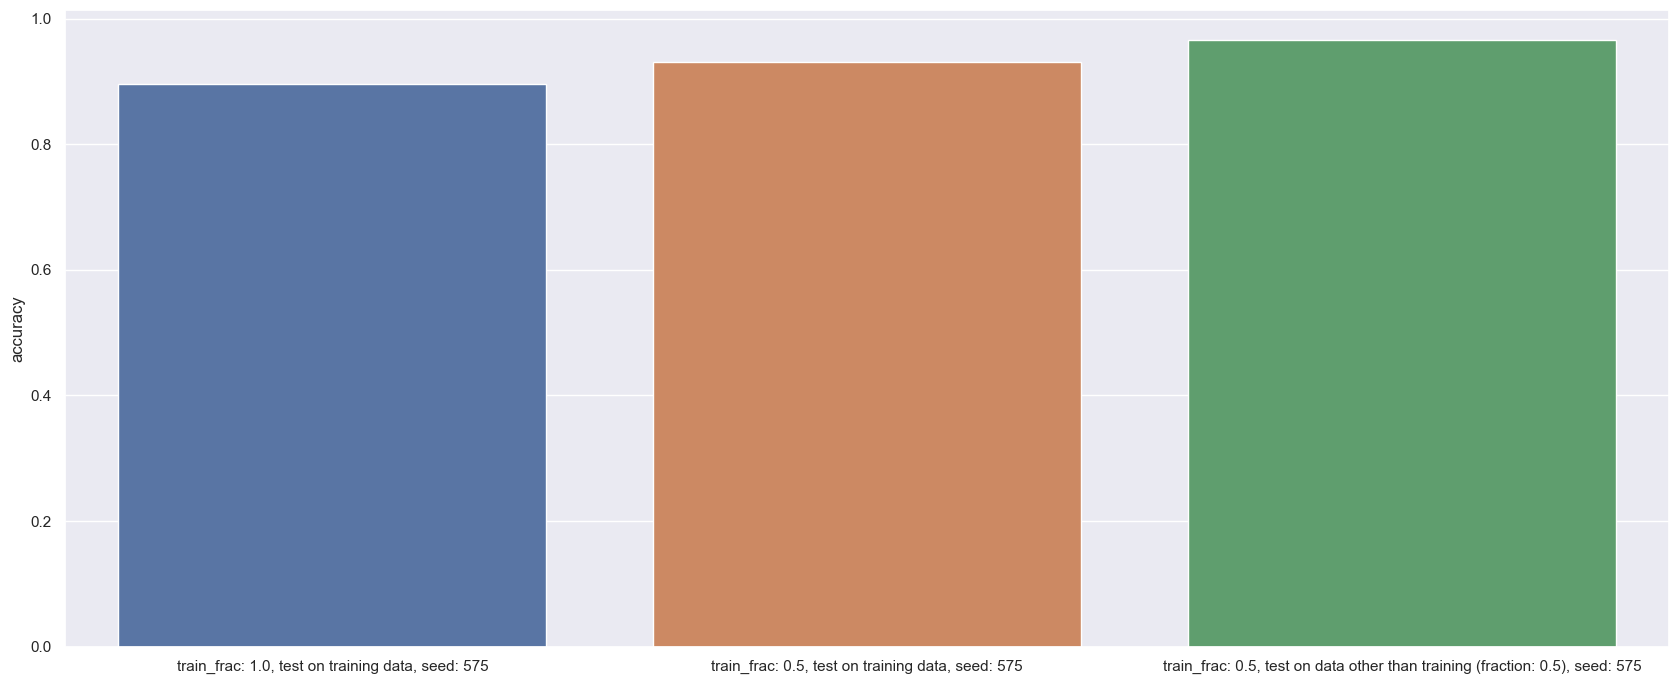

In [55]:
# plot the accuracy
gse.barplot_accuracy()

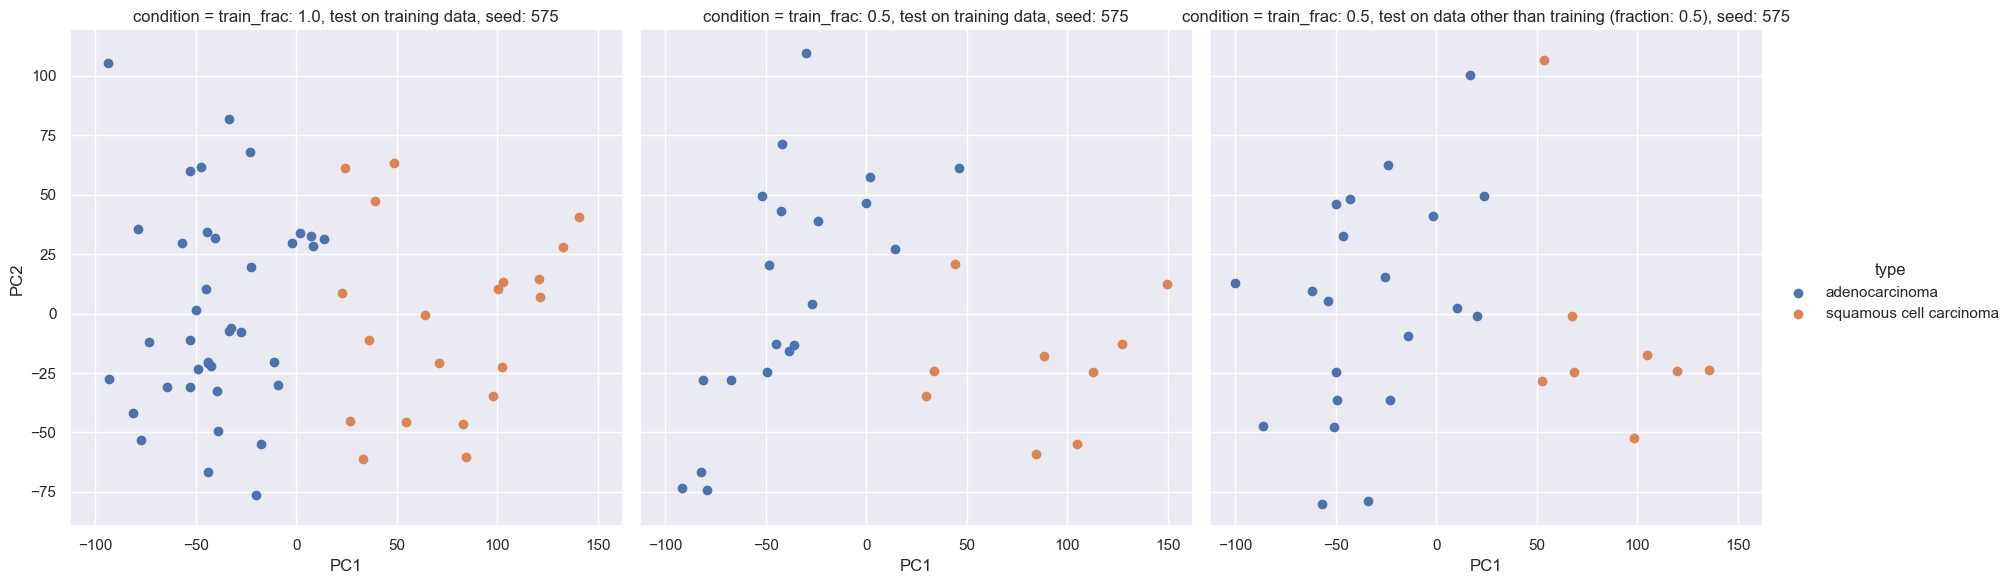

In [56]:
# bonus pca plot
gse.scatter_pca()